## Projeto 1: Análise e Monitoramento Financeiro de Vendas 
## para uma Empresa do ramo da Beleza
## Fase OLAP

Passo 1 - Bibliotecas

In [7]:
import pandas as pd
from sqlalchemy import create_engine, text


Conexão com o Banco

In [8]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Carrega variáveis do .env
load_dotenv()

# Pega valores do .env
usuario = os.getenv("DB_USER")
senha = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
porta = os.getenv("DB_PORT")
banco = os.getenv("DB_NAME")

# Monta a conexão
engine = create_engine(f"postgresql+psycopg2://{usuario}:{senha}@{host}:{porta}/{banco}")


Consultas OLAP

Receita por categoria de produto

In [9]:

with engine.connect() as conn:
    # Receita total por categoria de produto
    query1 = """
    SELECT p.categoria, SUM(v.total) AS receita
    FROM vendas v
    JOIN produtos p ON v.product_id = p.product_id
    GROUP BY p.categoria
    ORDER BY receita DESC;
    """
    result1 = pd.read_sql(query1, conn)
    display(result1)

,categoria,receita
0,Maquiagem,86068.10
1,Acessórios,84334.97
2,Skincare,65157.26
3,Cabelo,14641.64
4,Perfume,5015.39


 Ticket Médio = Faturamento Total das Vendas / Número de Vendas (ou Clientes). 

In [ ]:
with engine.connect() as conn:
    # ticket medio de vendas
    query3 = """
  select (ROUND(SUM(cast(v.total as DECIMAL(10,2))),2 )) / (COUNT(v.order_id) ) as ticket_medio
from vendas v;
    """
    result3 = pd.read_sql(query3, conn)
    display(result3)


,ticket_medio
0,510.43472


Ticket médio por categoria de produto

In [10]:


with engine.connect() as conn:
    # Ticket total por categoria de produto
    query2 = """
  select v.canal, ROUND(AVG(CAST(v.total AS DECIMAL(10,2))), 2) as Ticket_medio
  from vendas v
  group by v.canal
  order by Ticket_medio DESC;
    """
    result2 = pd.read_sql(query2, conn)
    display(result2)

,canal,ticket_medio
0,Online,547.61
1,Loja Física,494.73
2,Catálogo,491.85


Vendas mensais e Quantidade de Pedidos

In [12]:
with engine.connect() as conn:
   # Vendas mensais
    query4 = """
    SELECT DATE(DATE_TRUNC('month', v.order_date)) AS mes,
       SUM(v.total) AS receita,
       COUNT(DISTINCT v.order_id) AS pedidos
FROM vendas v
GROUP BY mes
ORDER BY mes;

    """
    result4 = pd.read_sql(query4, conn)
    display(result4)


,mes,receita,pedidos
0,2024-09-01,3984.78,9
1,2024-10-01,21669.20,39
2,2024-11-01,14962.64,33
3,2024-12-01,21346.29,44
4,2025-01-01,20773.34,42
5,2025-02-01,23827.99,41
6,2025-03-01,23987.64,49
7,2025-04-01,23892.58,46
8,2025-05-01,22412.69,42
9,2025-06-01,24871.98,49


Receita Mensal por Categoria

In [11]:
with engine.connect() as conn:
   # Vendas mensais
   query = """
SELECT p.categoria, ROUND(SUM(CAST(v.total AS DECIMAL(10,2))), 2) as receita
FROM vendas v
JOIN produtos p  on v.product_id=p.product_id
GROUP BY p.categoria 
ORDER BY receita DESC
"""

df_receita_categoria = pd.read_sql(query, engine)
df_receita_categoria.head()

,categoria,receita
0,Maquiagem,86068.10
1,Acessórios,84334.97
2,Skincare,65157.26
3,Cabelo,14641.64
4,Perfume,5015.39


Receita por categoria de produto → Barras horizontais

In [17]:
import altair as alt

In [23]:
query = """
SELECT p.categoria, ROUND(SUM(CAST(v.total AS DECIMAL(10,2))), 2) as receita
FROM vendas v
JOIN produtos p  on v.product_id=p.product_id
GROUP BY p.categoria 
ORDER BY receita DESC
"""
df_receita_categoria = pd.read_sql(query, engine)

alt.Chart(df_receita_categoria).mark_bar().encode(
    y='categoria:N',
    x='receita:Q',
    tooltip=['categoria', 'receita']
).properties(title="Receita por Categoria").interactive()


alt.Chart(...)

<Axes: title={'center': 'Receita por Categoria de Produto'}, ylabel='categoria'>

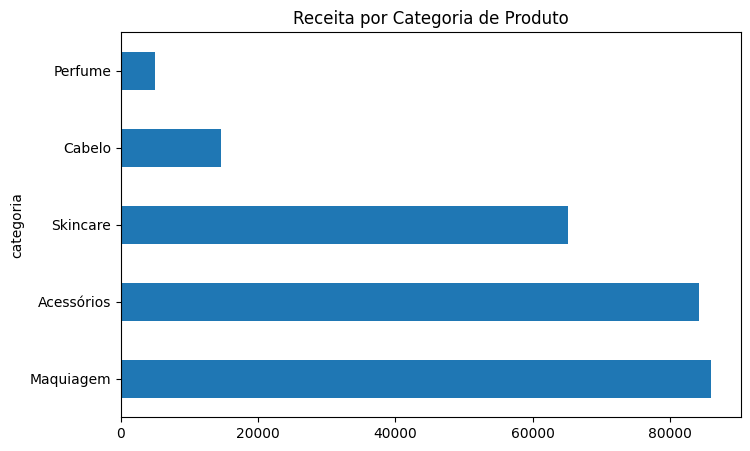

In [26]:
query = """
SELECT p.categoria, ROUND(SUM(CAST(v.total AS DECIMAL(10,2))), 2) as receita
FROM vendas v
JOIN produtos p ON v.product_id = p.product_id
GROUP BY p.categoria 
ORDER BY receita DESC;
"""
df_receita_categoria = pd.read_sql(query, engine)

df_receita_categoria.plot(
    kind="barh", 
    x="categoria", 
    y="receita", 
    legend=False, 
    figsize=(8,5), 
    title="Receita por Categoria de Produto"
)


<Axes: title={'center': 'Ticket Médio por Canal'}, xlabel='canal'>

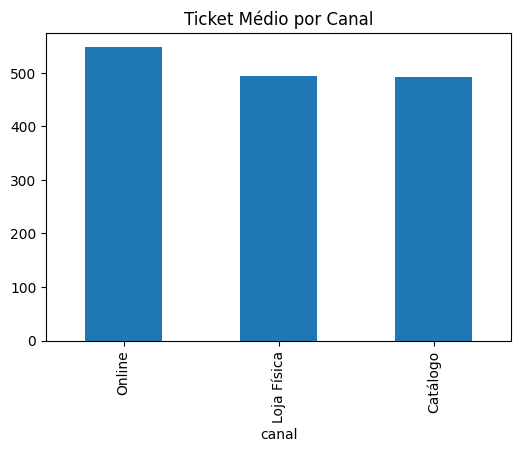

In [27]:
query = """
SELECT v.canal, AVG(v.total) as ticket_medio
FROM vendas v
GROUP BY v.canal
ORDER BY ticket_medio DESC;
"""
df_ticket_canal = pd.read_sql(query, engine)

df_ticket_canal.plot(
    kind="bar", 
    x="canal", 
    y="ticket_medio", 
    legend=False, 
    figsize=(6,4), 
    title="Ticket Médio por Canal"
)


Ticket médio por canal → Barras

<Axes: title={'center': 'Ticket Médio por Canal'}, xlabel='canal'>

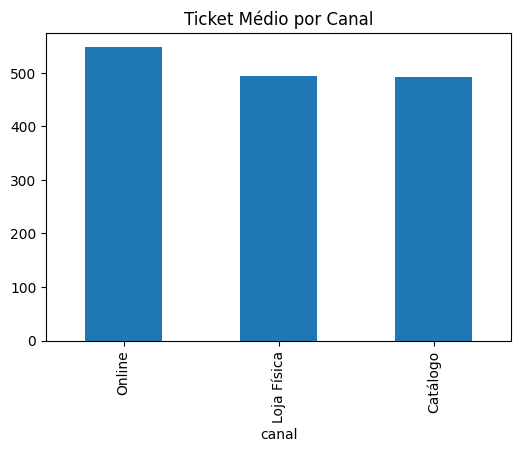

In [28]:
query = """
SELECT v.canal, AVG(v.total) as ticket_medio
FROM vendas v
GROUP BY v.canal
ORDER BY ticket_medio DESC;
"""
df_ticket_canal = pd.read_sql(query, engine)

df_ticket_canal.plot(
    kind="bar", 
    x="canal", 
    y="ticket_medio", 
    legend=False, 
    figsize=(6,4), 
    title="Ticket Médio por Canal"
)


Ticket médio geral → KPI

In [30]:
query = """
select (ROUND(SUM(cast(v.total as DECIMAL(10,2))),2 )) / (COUNT(v.order_id) ) as ticket_medio
from vendas v;
"""
df_ticket_geral = pd.read_sql(query, engine)
print("Ticket Médio Geral:", df_ticket_geral["ticket_medio"].iloc[0])


Ticket Médio Geral: 510.43472


Receita mensal → Linha temporal

<Axes: title={'center': 'Receita Mensal'}, xlabel='data'>

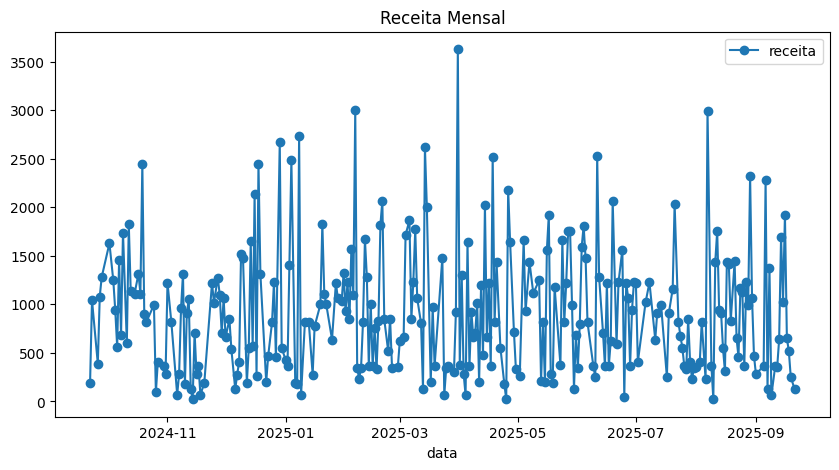

In [31]:
query = """
SELECT DATE(v.order_date) AS data, SUM(v.total) AS receita
FROM vendas v
GROUP BY v.order_date
ORDER BY data;
"""
df_receita_mensal = pd.read_sql(query, engine)

df_receita_mensal.plot(
    kind="line", 
    x="data", 
    y="receita", 
    marker="o", 
    figsize=(10,5), 
    title="Receita Mensal"
)



Quantidade de itens vendidos por estado → Barras

<Axes: title={'center': 'Itens Vendidos por Estado'}, xlabel='estado'>

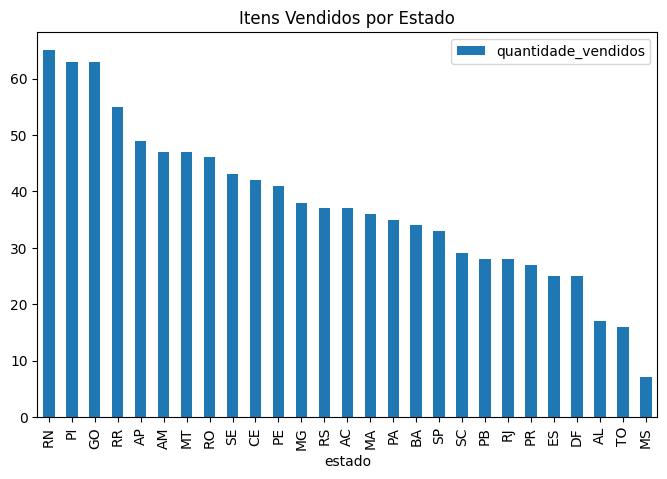

In [32]:
query = """
SELECT SUM(v.quantidade) as quantidade_vendidos, c.estado
FROM vendas v
JOIN clientes c ON v.customer_id = c.customer_id
GROUP BY c.estado
ORDER BY quantidade_vendidos DESC;
"""
df_itens_estado = pd.read_sql(query, engine)

df_itens_estado.plot(
    kind="bar", 
    x="estado", 
    y="quantidade_vendidos", 
    figsize=(8,5), 
    title="Itens Vendidos por Estado"
)


Top 10 produtos mais vendidos → Barras horizontais

In [39]:
query = """
select  COUNT(v.product_id ) as  contagem_produtos, p.nome_produto 
from vendas v
join produtos p on v.product_id =p.product_id
group by p.nome_produto  
order by contagem_produtos desc
limit 10;
"""
df_top_produtos = pd.read_sql(query, engine)



alt.Chart(df_top_produtos).mark_bar().encode(
    y='nome_produto:N',
    x='contagem_produtos:Q',
    tooltip=['nome_produto', 'contagem_produtos']
).properties(title="Top 10 Produtos Mais Vendidos").interactive()



alt.Chart(...)

Online vs Loja Física → Pizza

<Axes: title={'center': 'Comparativo: Online vs Loja Física'}, ylabel='total_vendas'>

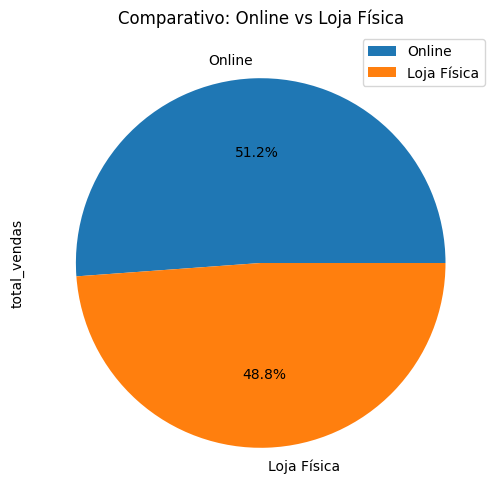

In [36]:
query = """
SELECT ROUND(SUM(CAST(v.total AS DECIMAL(10,2))),2) AS total_vendas, v.canal
FROM vendas v 
WHERE v.canal IN ('Online', 'Loja Física')
GROUP BY v.canal
ORDER BY total_vendas DESC;
"""
df_vendas_canal = pd.read_sql(query, engine)

df_vendas_canal.set_index("canal").plot(
    kind="pie", 
    y="total_vendas", 
    autopct='%1.1f%%', 
    figsize=(6,6), 
    title="Comparativo: Online vs Loja Física"
)


Comparativo de Sexo → Barras

<Axes: title={'center': 'Comparativo de Vendas por Sexo'}, xlabel='sexo'>

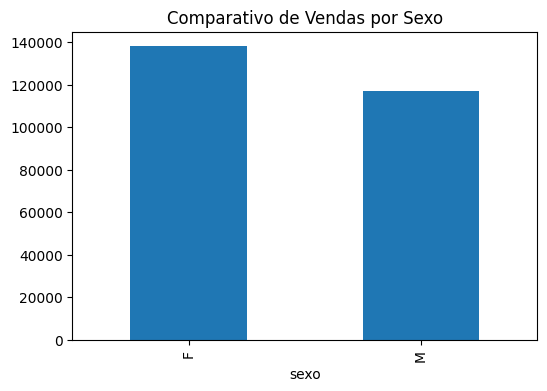

In [40]:
query = """
SELECT ROUND(SUM(CAST(v.total AS DECIMAL(10,2))),2) as total_vendas, c.sexo
FROM vendas v
JOIN clientes c ON v.customer_id = c.customer_id
GROUP BY c.sexo
ORDER BY total_vendas DESC;
"""
df_vendas_sexo = pd.read_sql(query, engine)

df_vendas_sexo.plot(
    kind="bar", 
    x="sexo", 
    y="total_vendas", 
    legend=False, 
    figsize=(6,4), 
    title="Comparativo de Vendas por Sexo"
)


In [46]:
query = """
SELECT ROUND(SUM(CAST(v.total AS DECIMAL(10,2))),2) as total_vendas, c.sexo
FROM vendas v
JOIN clientes c ON v.customer_id = c.customer_id
GROUP BY c.sexo
ORDER BY total_vendas DESC;
"""
df_vendas_sexo = pd.read_sql(query, engine)



# Gráfico de pizza (pie chart) correto
alt.Chart(df_vendas_sexo).mark_arc(innerRadius=0).encode(
    theta=alt.Theta(field="total_vendas", type="quantitative", stack=True),
    color=alt.Color(field="sexo", type="nominal", legend=alt.Legend(title="Sexo")),
    tooltip=['sexo', 'total_vendas']
).properties(
    title="Total de Vendas por Sexo",
    width=400,
    height=400
)





alt.Chart(...)